## Setting up HDDM model

In [1]:
import pandas as pd
import hddm

data = hddm.load_csv('risk_data.csv')

/anaconda3/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data.head()

,subj_idx,response,rt,gain,loss
0,1,1,8.310281,70,-60
1,1,1,0.798285,60,-30
2,1,0,1.017669,30,-100
3,1,0,1.332322,30,-60
4,1,0,1.946687,10,-20


In [3]:
# m = hddm.models.HDDMRegressor(data, ['v ~ gain + loss'], include=('z'), group_only_regressors=False)

Adding these covariates:
['v_Intercept', 'v_gain', 'v_loss']


In [4]:
# m.find_starting_values()

/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


In [5]:
# import os
# modelName = 'full'
# if not os.path.exists('savedModels/{}'.format(modelName)):
#     os.makedirs('savedModels/{}'.format(modelName))

# m.sample(5000, burn=1000, dbname='savedModels/{}/db_{}'.format(modelName, modelName), db='pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 23810.3 sec

In [6]:
# m.save('savedModels/{}/{}'.format(modelName, modelName))

In [3]:
modelName = 'full'
m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))

## Model parameters

In [5]:
m.print_stats()

                            mean         std         2.5q          25q          50q          75q       97.5q       mc err
a                        2.36375    0.065827      2.23527      2.32097      2.36158      2.40652     2.49661   0.00128621
a_std                   0.429852   0.0522799     0.342834     0.392941      0.42535     0.459972    0.549804   0.00123425
a_subj.1                 2.60615    0.100087      2.42265      2.53572      2.60577      2.67215     2.81033    0.0029825
a_subj.2                 2.03697   0.0864418      1.87151      1.97864       2.0358      2.09493     2.21095   0.00237934
a_subj.3                 2.97454    0.120181      2.74345      2.89143      2.97379      3.05413      3.2176   0.00317874
a_subj.4                 2.22904    0.100685      2.04388      2.15964      2.22631      2.29453     2.43681   0.00304251
a_subj.5                 2.41987    0.275603      1.94735      2.22413      2.39752      2.59325     3.02098   0.00923741
a_subj.6                

$\lambda$

In [4]:
import numpy as np
modelParamsDF = m.nodes_db
modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))

In [11]:
# group level mean of lambda
groupLevelMeanOfLambda = modelParamsDF.loc['v_loss', 'mean']/modelParamsDF.loc['v_gain', 'mean']
print("group level mean of lamdba is: ", round(groupLevelMeanOfLambda, 3))

# 95% CI for beta_G, beta_L
print("2.5% percentile for beta_L: ", round(modelParamsDF.loc['v_loss', '2.5q'], 3))
print("97.5% percentile for beta_G: ", round(modelParamsDF.loc['v_gain', '97.5q'], 3))

('group level mean of lamdba is: ', 1.486)
('2.5% percentile for beta_L: ', 0.02)
('97.5% percentile for beta_G: ', 0.018)


In [13]:
# how many participants have beta_L > beta_G, how many have the 95% CI greater?
# participant level mean (SD) of lambda
numSubjects = 49
numLambdaMean = 0
numLambdaCI = 0
allParticipantLambdas = []

for subjectIndex in range(1, numSubjects+1):
    beta_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    beta_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    beta_L_lowerBound = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), '2.5q']
    beta_G_upperBound = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), '97.5q']
    
    if beta_loss > beta_gain:
        numLambdaMean += 1
        
    if beta_L_lowerBound > beta_G_upperBound:
        numLambdaCI += 1
        
    lambdaForThisParticipant = beta_loss/beta_gain
    allParticipantLambdas.append(lambdaForThisParticipant)

print("Number of people with beta_L > beta_G = ", round(numLambdaMean, 3))
# print("Number of people with 95% CI of beta_L > beta_G = ", numLambdaCI)
print("Average lambda over all individuals = {} (SD = {})".format(round(np.mean(allParticipantLambdas), 3), round(np.std(allParticipantLambdas), 3)))

('Number of people with beta_L > beta_G = ', 40.0)
Average lambda over all individuals = 1.878 (SD = 1.161)


In [14]:
print("beta_L mean:", round(modelParamsDF.loc['v_loss', 'mean'], 3))
print("beta_L 2.5q:", round(modelParamsDF.loc['v_loss', '2.5q'], 3))
print("beta_L 97.5q:", round(modelParamsDF.loc['v_loss', '97.5q'], 3))
print("beta_L median", round(modelParamsDF.loc['v_loss', '50q'], 3))
print("beta_L SD", round(modelParamsDF.loc['v_loss', 'std'], 3))

print("beta_G mean:", round(modelParamsDF.loc['v_gain', 'mean'], 3))
print("beta_G 2.5q:", round(modelParamsDF.loc['v_gain', '2.5q'], 3))
print("beta_G 97.5q:", round(modelParamsDF.loc['v_gain', '97.5q'], 3))
print("beta_G median", round(modelParamsDF.loc['v_gain', '50q'], 3))
print("beta_G SD", round(modelParamsDF.loc['v_gain', 'std'], 3))

('beta_L mean:', 0.022)
('beta_L 2.5q:', 0.02)
('beta_L 97.5q:', 0.025)
('beta_L median', 0.022)
('beta_L SD', 0.001)
('beta_G mean:', 0.015)
('beta_G 2.5q:', 0.013)
('beta_G 97.5q:', 0.018)
('beta_G median', 0.015)
('beta_G SD', 0.001)


$\gamma$

In [15]:
# meanA = modelParamsDF.loc['a', 'mean']
# print("mean value of threshold: ", meanA)

# 95 CI interval
Z_CI_lowerBound = (modelParamsDF.loc['z'.format(subjectIndex), '2.5q'] - 0.5)*2
Z_CI_upperBound = (modelParamsDF.loc['z'.format(subjectIndex), '97.5q'] - 0.5)*2
print("confidence interval of gamma: ", round(Z_CI_lowerBound, 3), round(Z_CI_upperBound, 3))

('confidence interval of gamma: ', -0.267, -0.161)


In [17]:
# mean gamma across all participants, how many participants have 95% CI of gamma strictly negative
allParticipantsZ = []
countGammaMean = 0
countGammaCI = 0

for participantIndex in range(1, numSubjects+1):
    a_participant = modelParamsDF.loc['a_subj.{}'.format(participantIndex), 'mean']
    z_participant = (modelParamsDF.loc['z_subj.{}'.format(participantIndex), 'mean'] - 0.5)*2
    allParticipantsZ.append(z_participant)
    z_upperBound_participant = (modelParamsDF.loc['z_subj.{}'.format(participantIndex), '97.5q'] - 0.5)*2
    
    if z_upperBound_participant < 0:
        countGammaCI += 1
        
    if z_participant < 0:
        countGammaMean += 1
    
mean_Z = np.mean(allParticipantsZ)
SD_Z = np.std(allParticipantsZ)
print("Mean value of pre-valuation bias across all participants: {} (SD = {})".format(round(mean_Z, 3), round(SD_Z, 3)))
print("Number of participants with negative gamma: ", round(countGammaMean, 3))
print("Number of participants with 95% CI of gamma negative: ", round(countGammaCI, 3))

Mean value of pre-valuation bias across all participants: -0.202 (SD = 0.241)
('Number of participants with negative gamma: ', 37.0)
('Number of participants with 95% CI of gamma negative: ', 33.0)


In [18]:
print("gamma mean:", round((modelParamsDF.loc['z', 'mean'] - 0.5)*2, 3))
print("gamma 2.5q:", round((modelParamsDF.loc['z', '2.5q'] - 0.5)*2, 3))
print("gamma 97.5q:", round((modelParamsDF.loc['z', '97.5q'] - 0.5)*2, 3))
print("gamma median", round((modelParamsDF.loc['z', '50q'] - 0.5)*2, 3))
print("gamma SD", round((modelParamsDF.loc['z', 'std'])*2, 3))

('gamma mean:', -0.214)
('gamma 2.5q:', -0.267)
('gamma 97.5q:', -0.161)
('gamma median', -0.215)
('gamma SD', 0.027)


$\alpha$

In [19]:
# group-level mean
print("Group-level mean of alpha is: ", round(modelParamsDF.loc['v_Intercept'.format(subjectIndex), 'mean'], 3))

# how many participants have mean and 95% CI negative?
allParticipantsAlphas = []
countAlphaMean = 0
countAlphaCI = 0

for participantIndex in range(1, numSubjects+1):
    alpha_participant = modelParamsDF.loc['v_Intercept_subj.{}'.format(participantIndex), 'mean']
    allParticipantsAlphas.append(alpha_participant)
    alpha_upperBound_participant = modelParamsDF.loc['v_Intercept_subj.{}'.format(participantIndex), '97.5q']
    
    if alpha_upperBound_participant < 0:
        countAlphaCI += 1
        
    if alpha_participant < 0:
        countAlphaMean += 1
        
mean_alpha = np.mean(allParticipantsAlphas)
SD_alpha = np.std(allParticipantsAlphas)
print("Mean value of fixed utility bias across all participants: {} ({})".format(round(mean_alpha, 3), round(SD_alpha, 3)))
print("Number of participants with negative alpha: ", round(countAlphaMean, 3))
print("Number of participants with 95% CI of alpha negative: ", round(countAlphaCI, 3))

('Group-level mean of alpha is: ', -0.029)
Mean value of fixed utility bias across all participants: -0.03 (0.482)
('Number of participants with negative alpha: ', 24.0)
('Number of participants with 95% CI of alpha negative: ', 9.0)


In [21]:
print("alpha mean:", round(modelParamsDF.loc['v_Intercept', 'mean'], 3))
print("alpha 2.5q:", round(modelParamsDF.loc['v_Intercept', '2.5q'], 3))
print("alpha 97.5q:", round(modelParamsDF.loc['v_Intercept', '97.5q'], 3))
print("alpha median", round(modelParamsDF.loc['v_Intercept', '50q'], 3))
print("alpha SD", round(modelParamsDF.loc['v_Intercept', 'std'], 3))

('alpha mean:', -0.029)
('alpha 2.5q:', -0.209)
('alpha 97.5q:', 0.137)
('alpha median', -0.028)
('alpha SD', 0.088)


$\theta$

In [22]:
print("theta mean:", round(modelParamsDF.loc['a', 'mean']/2, 3))
print("theta 2.5q:", round(modelParamsDF.loc['a', '2.5q']/2, 3))
print("theta 97.5q:", round(modelParamsDF.loc['a', '97.5q']/2, 3))
print("theta median", round(modelParamsDF.loc['a', '50q']/2, 3))
print("theta SD", round(modelParamsDF.loc['a', 'std']/2, 3))

('theta mean:', 1.182)
('theta 2.5q:', 1.118)
('theta 97.5q:', 1.248)
('theta median', 1.181)
('theta SD', 0.033)


$\tau$

In [23]:
print("tau mean:", round(modelParamsDF.loc['t', 'mean'], 3))
print("tau 2.5q:", round(modelParamsDF.loc['t', '2.5q'], 3))
print("tau 97.5q:", round(modelParamsDF.loc['t', '97.5q'], 3))
print("tau median", round(modelParamsDF.loc['t', '50q'], 3))
print("tau SD", round(modelParamsDF.loc['t', 'std'], 3))

('tau mean:', 0.424)
('tau 2.5q:', 0.392)
('tau 97.5q:', 0.457)
('tau median', 0.423)
('tau SD', 0.016)


# Correlation with rejection rates

In [28]:
groupedData = data.groupby("subj_idx")
allParticipants_p_accept = groupedData["response"].aggregate(np.mean).to_list()

In [29]:
from scipy.stats.stats import pearsonr
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})

('Pearson correlation between Lambda and P(Acceptance) is: ', (-0.12629114150348733, 0.3872112384776163))


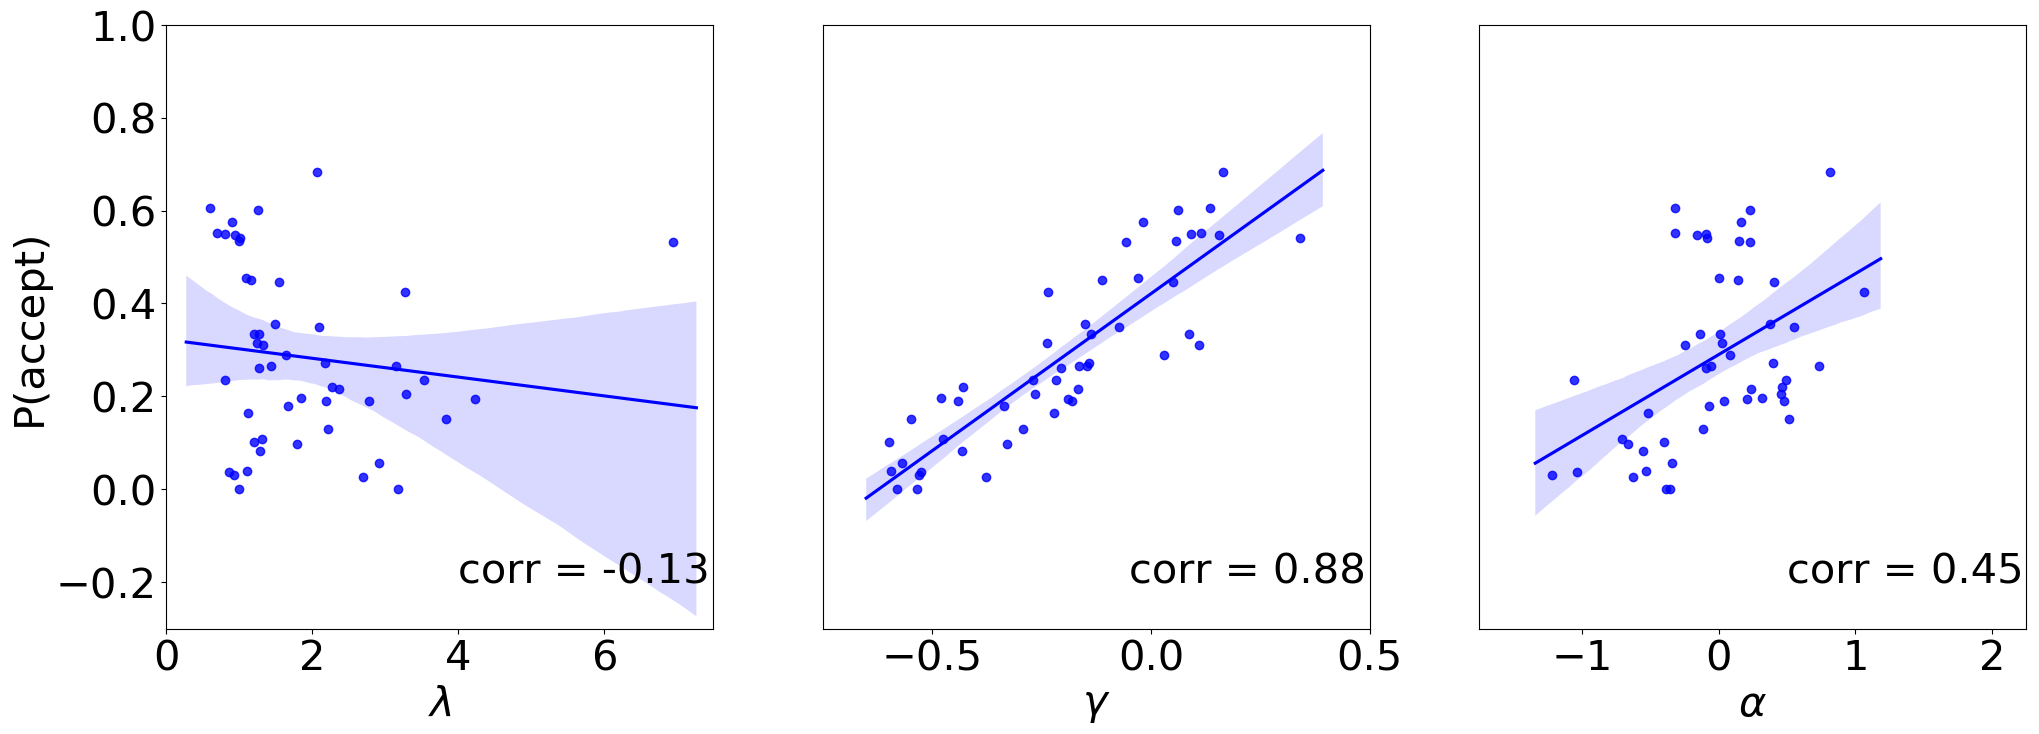

In [68]:
fig=plt.figure(figsize=(24,8), dpi= 100, facecolor='w', edgecolor='k')

ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0), colspan=1)
sns.regplot(allParticipantLambdas, allParticipants_p_accept, color ='blue', ax=ax1)
ax1.set_xlabel(r"$\lambda$")
ax1.set_ylabel("P(accept)")
ax1.annotate("corr = {}".format(round(pearsonr(allParticipantLambdas, allParticipants_p_accept)[0], 2)), (4, -0.2))
ax1.set_xlim(0, 7.5)
ax1.set_ylim(-0.3, 1)

ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1), colspan=1)
sns.regplot(allParticipantsZ, allParticipants_p_accept, color ='blue', ax=ax2)
ax2.set_xlabel(r"$\gamma$")
ax2.set_xlim(-0.75, 0.5)
ax2.set_ylim(-0.3, 1)
ax2.annotate("corr = {}".format(round(pearsonr(allParticipantsZ, allParticipants_p_accept)[0], 2)), (-0.05, -0.2))
# ax2.tick_params(axis='y', left=False)
ax2.set_yticks([])


ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2), colspan=1)
sns.regplot(allParticipantsAlphas, allParticipants_p_accept, color ='blue', ax=ax3)
ax3.set_xlabel(r"$\alpha$")
ax3.set_xlim(-1.75, 2.25)
ax3.set_ylim(-0.3, 1)
ax3.annotate("corr = {}".format(round(pearsonr(allParticipantsAlphas, allParticipants_p_accept)[0], 2)), (0.5, -0.2))
ax3.set_yticks([])

print("Pearson correlation between Lambda and P(Acceptance) is: ", pearsonr(allParticipantLambdas, allParticipants_p_accept))
plt.savefig("fig/pAccept_corr.png", bbox_inches='tight')

('Pearson correlation between gamma and P(Acceptance) is: ', (0.8771255512457918, 1.4039131240172478e-16))


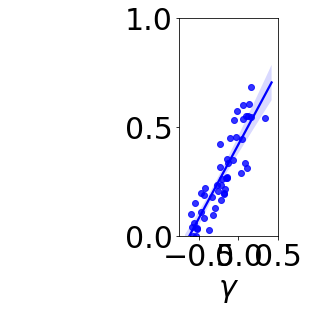

In [46]:
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1), colspan=1)
sns.regplot(allParticipantsZ, allParticipants_p_accept, color ='blue', ax=ax2)
ax2.set_xlabel(r"$\gamma$")
# ax1.set_ylabel("P(accept)")
# plt.xlabel(r"$\gamma$")
# plt.ylabel("P(accept)")
ax2.set_xlim(-0.75, 0.5)
ax2.set_ylim(0, 1)
ax2.annotate("corr = {}".format(round(pearsonr(allParticipantsZ, allParticipants_p_accept)[0], 2)), (-0.05, -0.05))
print("Pearson correlation between gamma and P(Acceptance) is: ", pearsonr(allParticipantsZ, allParticipants_p_accept))
# plt.savefig("fig/gamma_PAccept_corr.png", bbox_inches='tight')

('Pearson correlation between alpha and P(Acceptance) is: ', (0.45149523343692544, 0.0011289499965524712))


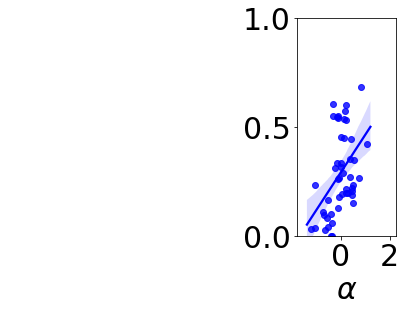

In [47]:
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2), colspan=1)
sns.regplot(allParticipantsAlphas, allParticipants_p_accept, color ='blue', ax=ax3)
ax3.set_xlabel(r"$\alpha$")
# plt.xlabel(r"$\alpha$")
# plt.ylabel("P(accept)")
ax3.set_xlim(-1.75, 2.25)
ax3.set_ylim(0, 1)
ax3.annotate("corr = {}".format(round(pearsonr(allParticipantsAlphas, allParticipants_p_accept)[0], 2)), (0.05, -0.05))
print("Pearson correlation between alpha and P(Acceptance) is: ", pearsonr(allParticipantsAlphas, allParticipants_p_accept))
# plt.savefig("fig/alpha_PAccept_corr.png", bbox_inches='tight')

# Correlation with lambda (traditional method -- computed using logistic regression)

In [20]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})

In [61]:
from sklearn.linear_model import LogisticRegression
indicesToAnalyze = []

for participantIndex in range(numSubjects):
    if allParticipants_p_accept[participantIndex] != 0:
        indicesToAnalyze.append(participantIndex)

def computeParticipantLambdaLR(subjectIndex):
    participantData = data[data['subj_idx'] == subjectIndex+1]
    X = participantData[['gain', 'loss']]
    y = participantData['response']
    classifier = LogisticRegression().fit(X, y)
    coefficients = classifier.coef_
    participantLambdaLR = coefficients[0][1]/coefficients[0][0]
    return participantLambdaLR

allParticipantLambdasLR = [computeParticipantLambdaLR(_) for _ in indicesToAnalyze]

/anaconda3/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
print(max(allParticipantLambdasLR))

6.873186844152717


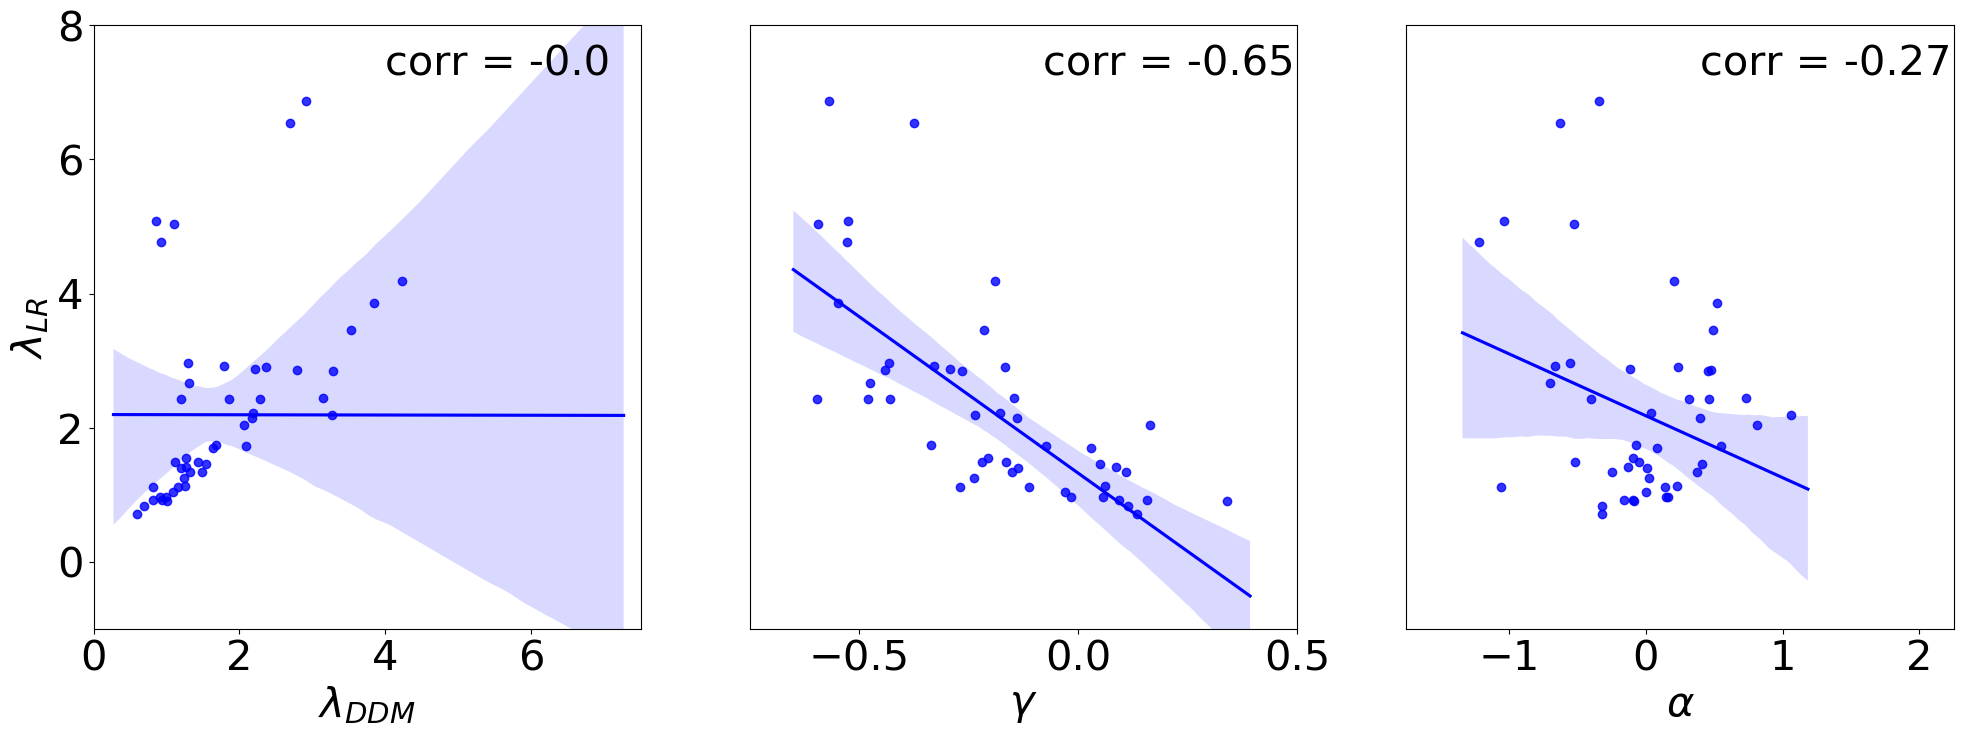

In [76]:
fig=plt.figure(figsize=(24,8), dpi= 100, facecolor='w', edgecolor='k')

lambdasToCorrelate = np.array(allParticipantLambdas)[indicesToAnalyze]
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0), colspan=1)
sns.regplot(lambdasToCorrelate, allParticipantLambdasLR, color ='blue', ax=ax1)
ax1.set_xlabel(r"$\lambda_{DDM}$")
ax1.set_ylabel(r"$\lambda_{LR}$")
ax1.annotate("corr = {}".format(round(pearsonr(lambdasToCorrelate, allParticipantLambdasLR)[0], 2)), (4, 7.25))
ax1.set_xlim(0, 7.5)
ax1.set_ylim(-1, 8)

gammasToCorrelate = np.array(allParticipantsZ)[indicesToAnalyze]
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1), colspan=1)
sns.regplot(gammasToCorrelate, allParticipantLambdasLR, color ='blue', ax=ax2)
ax2.set_xlabel(r"$\gamma$")
ax2.set_xlim(-0.75, 0.5)
ax2.set_ylim(-1, 8)
ax2.annotate("corr = {}".format(round(pearsonr(gammasToCorrelate, allParticipantLambdasLR)[0], 2)), (-0.08, 7.25))
# ax2.tick_params(axis='y', left=False)
ax2.set_yticks([])


alphasToCorrelate = np.array(allParticipantsAlphas)[indicesToAnalyze]
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2), colspan=1)
sns.regplot(alphasToCorrelate, allParticipantLambdasLR, color ='blue', ax=ax3)
ax3.set_xlabel(r"$\alpha$")
ax3.set_xlim(-1.75, 2.25)
ax3.set_ylim(-1, 8)
ax3.annotate("corr = {}".format(round(pearsonr(alphasToCorrelate, allParticipantLambdasLR)[0], 2)), (0.4, 7.25))
ax3.set_yticks([])

plt.savefig("fig/lambda_LR_corr.png", bbox_inches='tight')

('Pearson correlation between P(accept) and Logistic regression lambda is: ', (-0.7244383372995986, 8.598093421661733e-09))


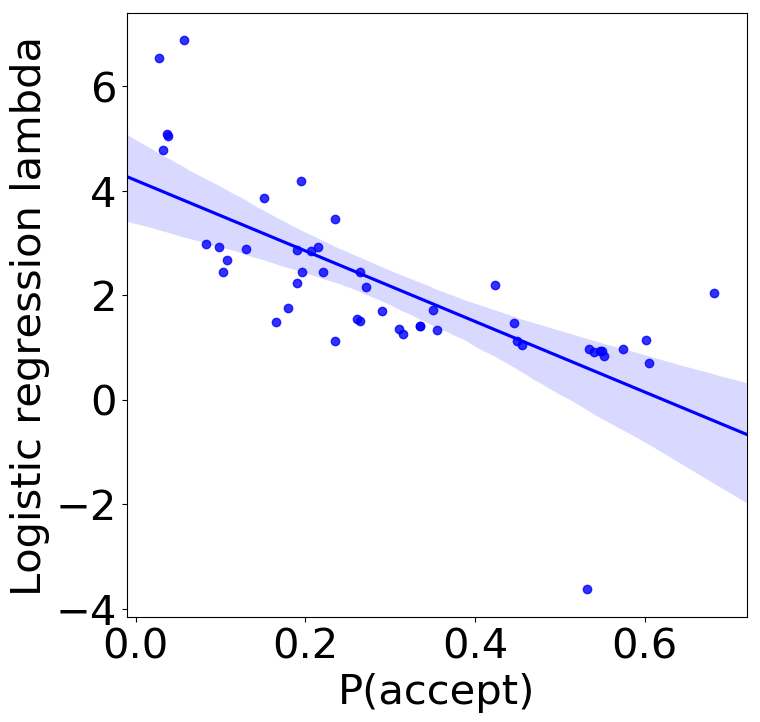

In [22]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
pAcceptToCorrelate = np.array(allParticipants_p_accept)[indicesToAnalyze]
sns.regplot(pAcceptToCorrelate, allParticipantLambdasLR, color ='blue')
plt.xlabel("P(accept)")
plt.ylabel("Logistic regression lambda")
print("Pearson correlation between P(accept) and Logistic regression lambda is: ", pearsonr(pAcceptToCorrelate, allParticipantLambdasLR))

('Pearson correlation between DDM lambda and Logistic regression lambda is: ', (-0.001246938912586985, 0.9933629649938611))


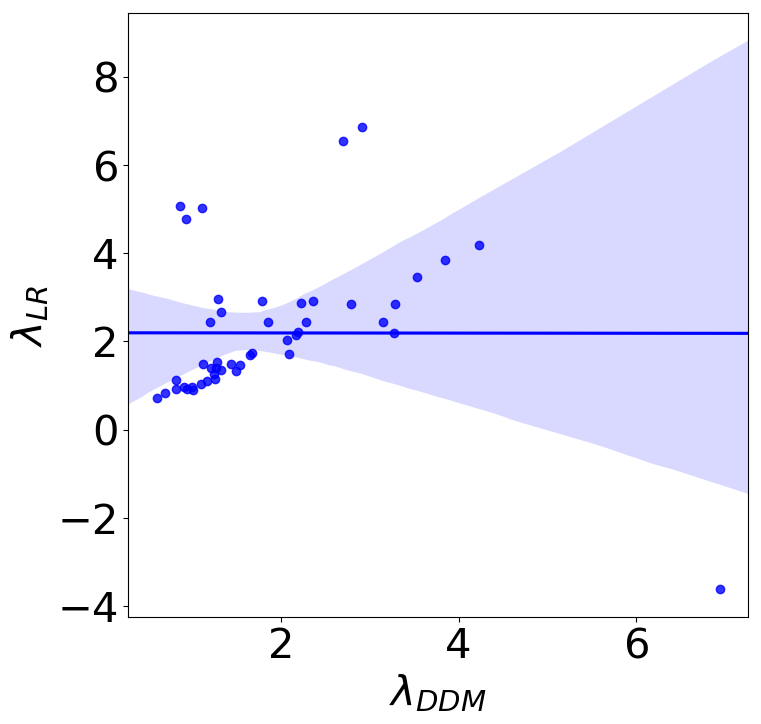

In [23]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
lambdasToCorrelate = np.array(allParticipantLambdas)[indicesToAnalyze]
sns.regplot(lambdasToCorrelate, allParticipantLambdasLR, color ='blue')
plt.xlabel(r"$\lambda_{DDM}$")
plt.ylabel(r"$\lambda_{LR}$")
print("Pearson correlation between DDM lambda and Logistic regression lambda is: ", pearsonr(lambdasToCorrelate, allParticipantLambdasLR))

('Pearson correlation between gamma and Logistic regression lambda is: ', (-0.6510439108109065, 7.234863049997738e-07))


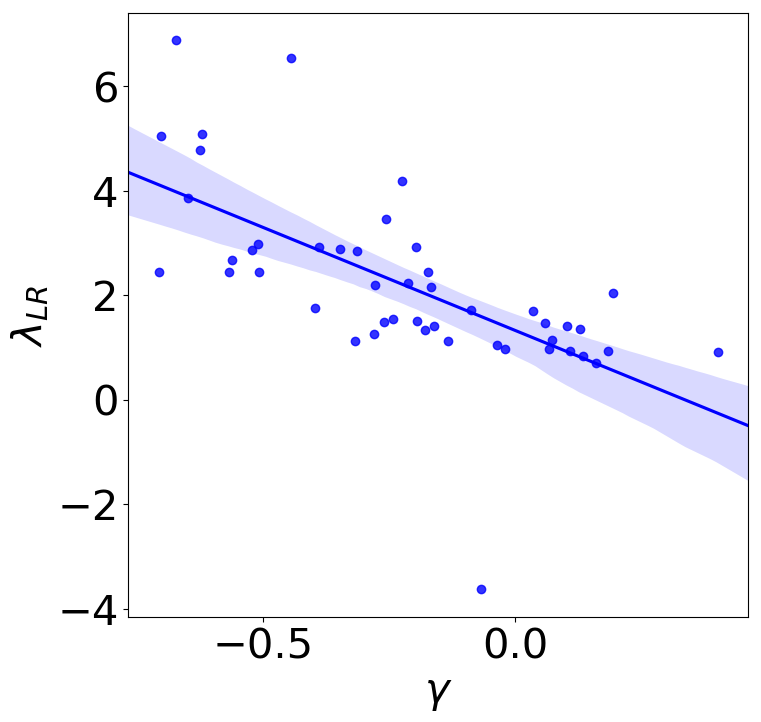

In [24]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
gammasToCorrelate = np.array(allParticipantsZ)[indicesToAnalyze]
sns.regplot(gammasToCorrelate, allParticipantLambdasLR, color ='blue')
plt.xlabel(r"$\gamma$")
plt.ylabel(r"$\lambda_{LR}$")
print("Pearson correlation between gamma and Logistic regression lambda is: ", pearsonr(gammasToCorrelate, allParticipantLambdasLR))

('Pearson correlation between P(accept) and Logistic regression lambda is: ', (-0.2673586676120099, 0.06924875195856046))


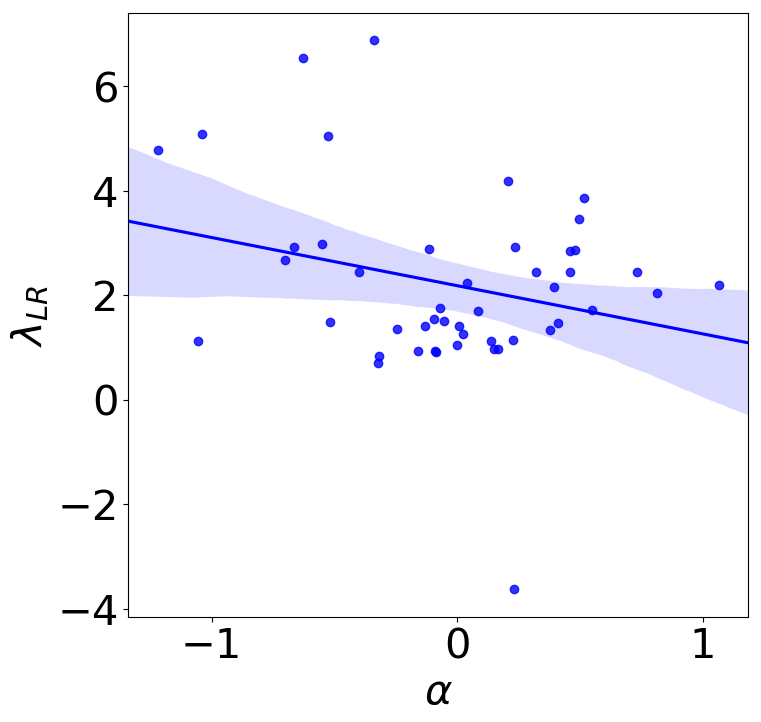

In [25]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
alphasToCorrelate = np.array(allParticipantsAlphas)[indicesToAnalyze]
sns.regplot(alphasToCorrelate, allParticipantLambdasLR, color ='blue')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\lambda_{LR}$")
print("Pearson correlation between P(accept) and Logistic regression lambda is: ", pearsonr(alphasToCorrelate, allParticipantLambdasLR))

## Standardized multiple regression $\lambda_{LR}$

In [75]:
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats.mstats import zscore
import pandas as pd

y = np.reshape(allParticipantLambdasLR, (-1, 1))
X = np.vstack((lambdasToCorrelate, gammasToCorrelate, alphasToCorrelate)).T
# X = np.vstack((allParticipantLambdas, allParticipantsZ, allParticipantsAlphas)).T

combined = np.hstack((y, zscore(X)))
df = pd.DataFrame(combined)
df.columns = ['y', 'x1', 'x2', 'x3']
df_z = df.select_dtypes(include=[np.number]).dropna()#.apply(stats.zscore)


formula = 'y ~ x1 + x2 + x3'
result = smf.ols(formula, data=df_z).fit()
result.summary()


# print(np.shape(y))
# print(np.shape(X))

# print(sm.OLS(zscore(y), zscore(X)).fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.46e-05
Time:                        19:16:52   Log-Likelihood:                -77.437
No. Observations:                  47   AIC:                             162.9
Df Residuals:                      43   BIC:                             170.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1942      0.192     11.447      0.000       1.808       2.581
x1            -0.1968      0.235     -0.836      0.408      -0.671       0.278
x2            -1.1219      0.217     -5.160      0.000      -1.560      -0.683
x3            -0.0220      0.242     -0.091      0.928      -0.511       0.467
==============================================================================
Omnibus:                        7.724   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.716
Skew:                          -0.062   Prob(JB):                     0.000638
Kurtosis:                       5.738   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print(round(-0.1219, 3))

-0.122


# Simulate data from model

In [7]:
ppc_data = hddm.utils.post_pred_gen(m, samples=50, progress_bar=True)

 [------------------106%------------------] 52 of 49 complete in 13910.7 sec

In [9]:
import numpy as np
dataArray = np.genfromtxt("risk_data.csv", delimiter=',')
dataArray = dataArray[1:, :]

def extractStakesFromParticipantIndex(participantIndex):
    participantData = dataArray[dataArray[:, 0] == participantIndex][:]
    participantStakes = participantData[:, -2:]
    return participantStakes

In [10]:
import numpy as np

overallData = np.zeros((1, 5))

for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    print("-------")
    print("node: ", node)
    sim_data_array = np.asarray(sim_data)
    numTrials = np.shape(sim_data_array)[0]
    print("number of trials: ", numTrials)
    participantIndex = int(filter(str.isdigit, node))
    participantStakes = extractStakesFromParticipantIndex(participantIndex)
    participantIndexArray = np.full((numTrials, 1), participantIndex)
    responsesArray = np.zeros((numTrials, 1))
    responsesArray[sim_data_array[:, 0] > 0] = 1
    reactionTimesArray = np.abs(sim_data_array)
    sim_data_modified = np.hstack((participantIndexArray, responsesArray, reactionTimesArray, participantStakes))
    overallData = np.vstack((overallData, sim_data_modified))
    
print(np.shape(overallData))

-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('number of trials: ', 200)
-------
('node: ', 'wfpt.1')
('

-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node: ', 'wfpt.12')
('number of trials: ', 196)
-------
('node

('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.15')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wfpt.16')
('number of trials: ', 200)
-------
('node: ', 'wf

-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node: ', 'wfpt.19')
('number of trials: ', 154)
-------
('node

-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node: ', 'wfpt.21')
('number of trials: ', 200)
-------
('node

-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
('number of trials: ', 22)
-------
('node: ', 'wfpt.24')
(

-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node: ', 'wfpt.27')
('number of trials: ', 195)
-------
('node

-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.3')
('number of trials: ', 194)
-------
('node: ', 'wfpt.30')
(

-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node: ', 'wfpt.32')
('number of trials: ', 183)
-------
('node

-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node: ', 'wfpt.35')
('number of trials: ', 200)
-------
('node

-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node: ', 'wfpt.38')
('number of trials: ', 200)
-------
('node

-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node: ', 'wfpt.40')
('number of trials: ', 200)
-------
('node

-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node: ', 'wfpt.43')
('number of trials: ', 192)
-------
('node

-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node: ', 'wfpt.46')
('number of trials: ', 182)
-------
('node

-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node: ', 'wfpt.49')
('number of trials: ', 200)
-------
('node

-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('number of trials: ', 166)
-------
('node: ', 'wfpt.7')
('

In [11]:
import pandas as pd

import os
if not os.path.exists('simulatedData/{}'.format(modelName)):
    os.makedirs('simulatedData/{}'.format(modelName))


df = pd.DataFrame(overallData[1:, :])
df.columns = ['subj_idx', 'response', 'rt', 'gain', 'loss']
df.to_csv('simulatedData/{}/{}.csv'.format(modelName, modelName))
# np.savetxt("simulatedData.csv", overallData, delimiter=",", fmt='%.5f')

In [65]:
a = np.genfromtxt("simulatedData.csv", delimiter=',')[1:, :]
print(a[-1, :])

[ 33.           0.           0.97222378  50.         -80.        ]
